<a href="https://colab.research.google.com/github/khraina/FRESCO/blob/main/endtoend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
import matplotlib.pyplot as plt

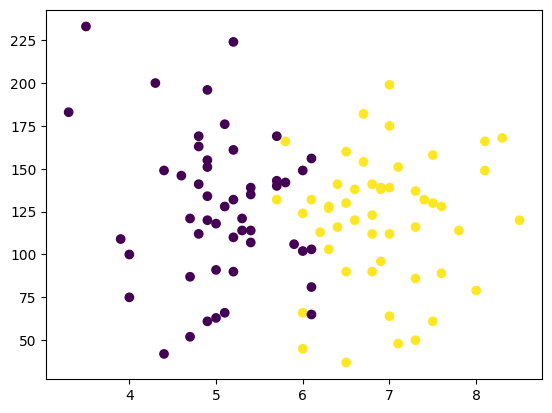

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [ ]:

X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [ ]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)


In [ ]:
X_train


,cgpa,iq
8,6.1,156.0
49,5.4,135.0
22,4.9,120.0
86,5.1,128.0
18,4.0,100.0
...,...,...
5,7.1,48.0
53,8.3,168.0
39,4.6,146.0
31,3.9,109.0


In [ ]:
y_train

,placement
8,0
49,0
22,0
86,0
18,0
...,...
5,1
53,1
39,0
31,0


In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)


In [ ]:
X_train


array([[ 0.07463257,  0.83065003],
       [-0.52816897,  0.31810398],
       [-0.9587415 , -0.04800034],
       [-0.78651249,  0.14725529],
       [-1.73377205, -0.53613944],
       [ 0.93577763,  0.70861526],
       [ 0.07463257, -0.99987159],
       [ 0.33297609,  0.46454571],
       [ 0.59131961,  1.46523086],
       [ 0.67743411, -0.78020899],
       [-0.9587415 ,  0.70861526],
       [ 0.76354862,  0.39132484],
       [ 1.53857917, -0.19444207],
       [-0.78651249,  1.31878913],
       [-0.01148193, -0.48732553],
       [-0.26982545,  1.14794045],
       [ 0.07463257, -0.46291858],
       [ 0.24686158, -0.46291858],
       [-1.13097051, -0.85342986],
       [ 0.84966312,  1.88014909],
       [-0.61428348, -0.19444207],
       [-1.47542853,  1.90455605],
       [ 1.36635016, -0.80461595],
       [ 0.67743411, -0.24325598],
       [ 1.28023565,  0.87946394],
       [-1.73377205, -1.14631331],
       [ 0.33297609, -0.14562816],
       [-0.26982545,  0.24488311],
       [-0.18371095,

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
X_test

array([[ 0.67743411,  0.46454571],
       [-0.01148193,  0.65980135],
       [-1.044856  ,  1.14794045],
       [ 0.76354862,  0.4157318 ],
       [-0.26982545,  0.51335962],
       [-1.044856  , -0.24325598],
       [ 1.10800664,  0.36691789],
       [-0.87262699, -0.75580204],
       [-0.70039798,  0.95268481],
       [-0.52816897,  0.4157318 ]])

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
clf = LogisticRegression()

In [ ]:
# model training
clf.fit(X_train,y_train)


LogisticRegression()

In [ ]:
#predicted values
y_pred=clf.predict(X_test)

In [ ]:
#actual values
y_test


,placement
43,1
33,0
75,0
60,1
6,0
59,0
61,1
25,0
47,0
12,0


In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
accuracy_score(y_test,y_pred)


0.9

In [ ]:
from mlxtend.plotting import plot_decision_regions


<Axes: >

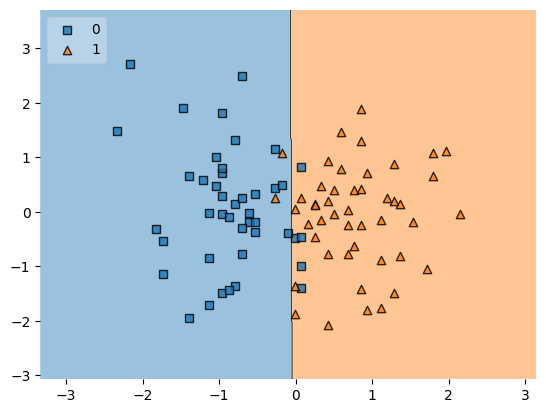

In [ ]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)



In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))
